https://lms.mipt.ru/mod/quiz/view.php?id=154108

## 1 задание

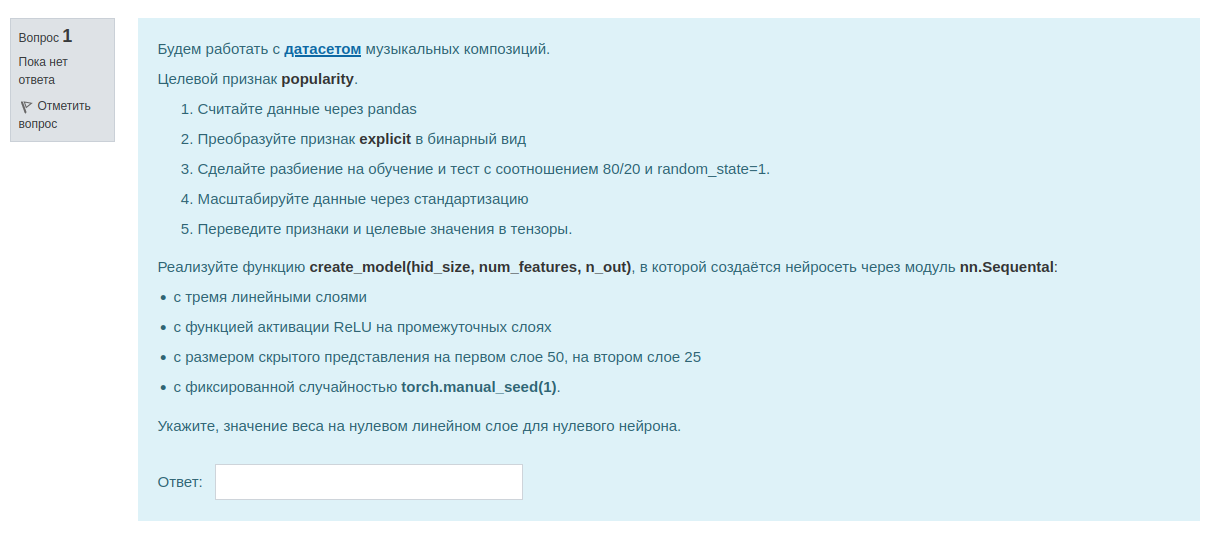

In [ ]:
!wget 'https://drive.google.com/uc?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa' -O music.csv

--2024-11-07 09:14:04--  https://drive.google.com/uc?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa [following]
--2024-11-07 09:14:04--  https://drive.usercontent.google.com/download?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:811::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418838 (409K) [application/octet-stream]
Saving to: ‘music.csv’

music.csv           100%[===================>] 409.02K  --.-KB/s    in 0.06s   

2024-11-07 09:14:06 (6.18 MB/s) - ‘music.csv’ saved [4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('music.csv')
print(df.shape)
df.head()

(5000, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [ ]:
df['explicit'] = df['explicit'].astype('int')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,0,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,0,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,0,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,0,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,0,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [ ]:
from sklearn.model_selection import train_test_split

target = 'popularity'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=1)

X_train.shape, X_test.shape

((4000, 15), (1000, 15))

Масштабируйте данные через стандартизацию

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

Переведите признаки и целевые значения в тензоры.

In [ ]:
import torch

X_train_torch = torch.FloatTensor(X_train.values)
X_test_torch = torch.FloatTensor(X_test.values)
y_train_torch = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_torch = torch.FloatTensor(y_test.values).reshape(-1, 1)

Реализуйте функцию `create_model(hid_size, num_features, n_out)`, в которой создаётся нейросеть через модуль `nn.Sequental`:
- с тремя линейными слоями
- с функцией активации ReLU на промежуточных слоях
- с размером скрытого представления на первом слое 50, на втором слое 25
- с фиксированной случайностью `torch.manual_seed(1)`.

In [ ]:
from torch import nn


def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)  # для фиксации случайности

    model = nn.Sequential(
        nn.Linear(num_features, hid_size),
        nn.ReLU(),
        nn.Linear(hid_size, hid_size//2),
        nn.ReLU(),
        nn.Linear(hid_size//2, n_out)
    )

    return model


num_features = X_train.shape[1]
n_out = 1
hid_size = 50


model = create_model(hid_size, num_features, n_out)
model

Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=1, bias=True)
)

Укажите, значение веса на нулевом линейном слое для нулевого нейрона.

In [ ]:
model[0].weight[0][0]

tensor(0.1330, grad_fn=<SelectBackward0>)

## 2 задание

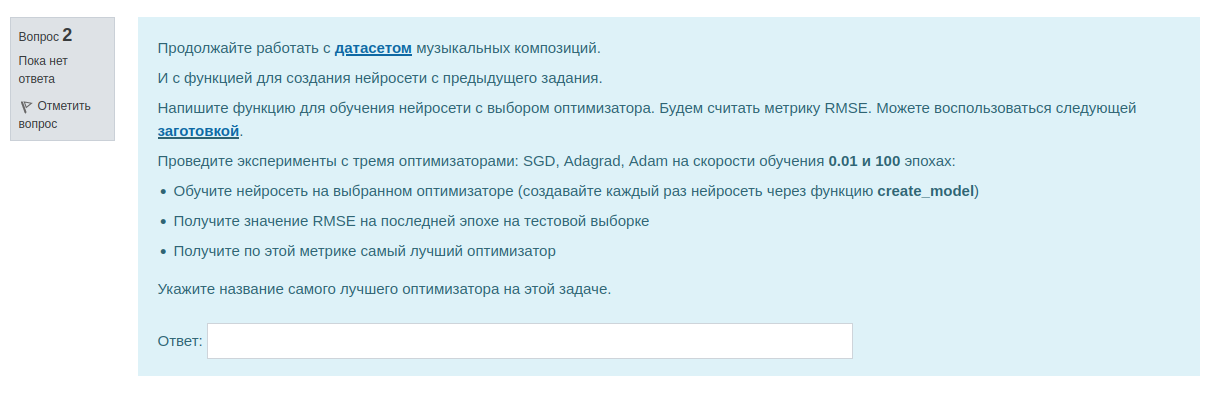

Напишите функцию для обучения нейросети с выбором оптимизатора. Будем считать метрику RMSE. Можете воспользоваться следующей заготовкой:

```
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100):
    loss_fn = ...
    loss_train, loss_test = [], []


    for epoch_num in range(n_epoch):
        ...  # обнуление градиентов
        y_predicted = ...  # получение предсказаний
        loss = ...  # подсчет функции потерь

        ...  # обратный проход
        ...  # шаг оптимизации
        loss_train.append(np.sqrt(loss.item()))

        y_pred = ...  # получение предсказаний на тесте
        mse = ...  # подсчет функции потерь на тесте
        loss_test.append(np.sqrt(mse.item()))
        
    return model, loss_train, loss_test


```

In [ ]:
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100):
    loss_fn = nn.MSELoss()
    loss_train, loss_test = [], []


    for epoch_num in range(n_epoch):
        opt.zero_grad()  # обнуление градиентов
        y_predicted = model(X_train)  # получение предсказаний
        loss = loss_fn(y_predicted, y_train)  # подсчет функции потерь
        loss.backward()  # обратный проход
        opt.step()  # шаг оптимизации
        loss_train.append(np.sqrt(loss.item()))

        y_pred = model(X_test)  # получение предсказаний на тесте
        mse = loss_fn(y_pred, y_test)  # подсчет функции потерь на тесте
        loss_test.append(np.sqrt(mse.item()))

    return model, loss_train, loss_test

Проведите эксперименты с тремя оптимизаторами: SGD, Adagrad, Adam на скорости обучения `0.01`:

- Обучите нейросеть на выбранном оптимизаторе (создавайте каждый раз нейросеть через функцию `create_model`)
- Получите значение RMSE на последней эпохе на тестовой выборке
- Получите по этой метрике самый лучший оптимизатор

Укажите название самого лучшего оптимизатора на этой задаче.


In [ ]:
min_loss = 1e10
best_optim = None

for opt_name in ["SGD", "Adagrad", "Adam"]:
    model = create_model(hid_size, num_features, n_out)
    if opt_name == 'SGD':
        opt = torch.optim.SGD(model.parameters(), lr=0.01)
    elif opt_name == 'Adagrad':
        opt = torch.optim.Adagrad(model.parameters(), lr=0.01)
    elif opt_name == 'Adam':
        opt = torch.optim.Adam(model.parameters(), lr=0.01)

    print(model[0].weight[0][0])


    model, loss_train, loss_test = train_model(
        model, opt,
        X_train_torch, y_train_torch,
        X_test_torch, y_test_torch)

    if loss_test[-1] < min_loss:
        min_loss = loss_test[-1]
        best_optim = opt_name

    print(opt_name, loss_test[-1])

print('best optimizer is', best_optim)

tensor(0.1330, grad_fn=<SelectBackward0>)
SGD 28.003876553984114
tensor(0.1330, grad_fn=<SelectBackward0>)
Adagrad 29.32207666055561
tensor(0.1330, grad_fn=<SelectBackward0>)
Adam 27.61319476972241
best optimizer is Adam


## 3 задание

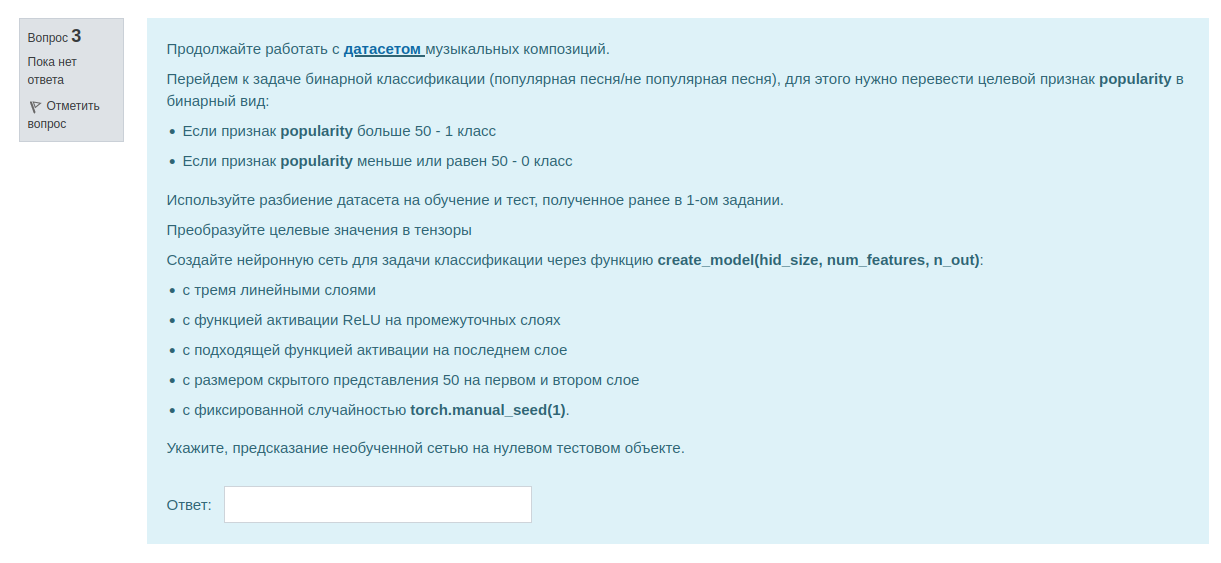

In [ ]:
import numpy as np

y_train_bin = np.zeros_like(y_train)
y_train_bin[y_train > 50] = 1

y_train_bin = pd.Series(y_train_bin)
y_train_bin.value_counts()

,count
0,2373
1,1627


In [ ]:
y_test_bin = np.zeros_like(y_test)
y_test_bin[y_test > 50] = 1

y_test_bin = pd.Series(y_test_bin)
y_test_bin.value_counts()

,count
0,599
1,401


Преобразуйте целевые значения в тензоры

In [ ]:
y_train_torch_bin = torch.FloatTensor(y_train_bin.values).reshape(-1, 1)
y_test_torch_bin = torch.FloatTensor(y_test_bin.values).reshape(-1, 1)

Создайте нейронную сеть для задачи классификации через функцию `create_model(hid_size, num_features, n_out)`:
- с тремя линейными слоями
- с функцией активации ReLU на промежуточных слоях
- с подходящей функцией активации на последнем слое
- с размером скрытого представления 50 на первом и втором слое
- с фиксированной случайностью `torch.manual_seed(1)`.

In [ ]:
import torch
from torch import nn


def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)  # для фиксации случайности

    model = nn.Sequential(
        nn.Linear(num_features, hid_size),
        nn.ReLU(),
        nn.Linear(hid_size, hid_size),
        nn.ReLU(),
        nn.Linear(hid_size, n_out),
        nn.Sigmoid()
    )

    return model


num_features = X_train.shape[1]
n_out = 1
hid_size = 50


model = create_model(hid_size, num_features, n_out)
model

Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
  (5): Sigmoid()
)

Укажите, предсказание необученной сетью на нулевом тестовом объекте.

In [ ]:
model(X_test_torch[:1])

tensor([[0.4744]], grad_fn=<SigmoidBackward0>)

## 4 задание

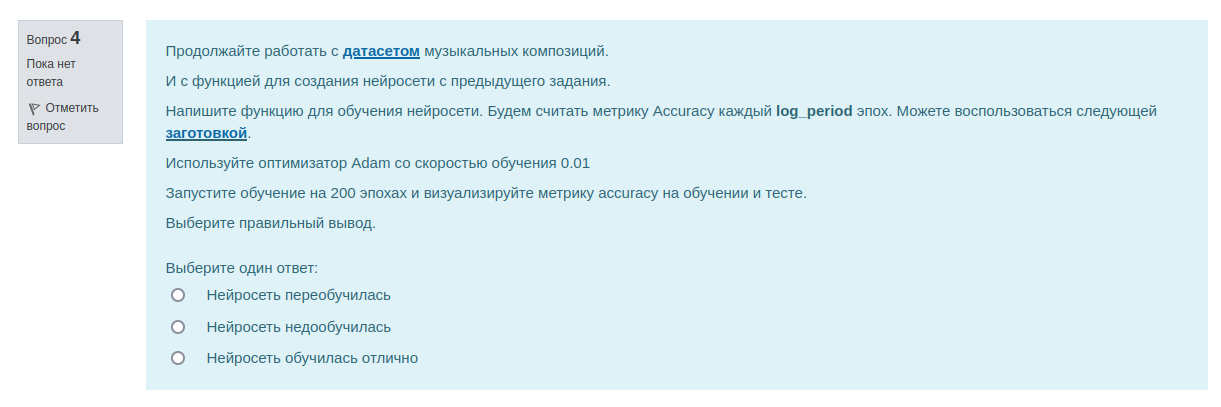

Напишите функцию для обучения нейросети. Будем считать метрику Accuracy каждый `log_period` эпох. Можете воспользоваться следующей заготовкой:

```
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100, log_period=10):
    loss_fn = ...
    loss_train, loss_test = [], []
    acc_train, acc_test = [], []

    for epoch_num in range(n_epoch):
        ...  # обнуление градиентов
        y_predicted = model(X_train)  # получение предсказаний
        loss = ...  # подсчет функции потерь

        loss.backward()  # обратный проход
        ...  # шаг оптимизации

        if epoch_num % log_period == 0:
            loss_train.append(loss.item())

            acc = ...  # подсчет метрики на обучении
            acc_train.append(acc)

            y_pred = model(X_test)  # получение предсказаний на тесте
            bce = loss_fn(y_pred, y_test)  # подсчет функции потерь на тесте
            loss_test.append(bce.item())

            acc = ...  # подсчет метрики на тесте
            acc_test.append(acc)
            
    return model, loss_train, loss_test, acc_train, acc_test
```

In [ ]:
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100, log_period=10):
    loss_fn = nn.BCELoss()
    loss_train, loss_test = [], []
    acc_train, acc_test = [], []

    for epoch_num in range(n_epoch):
        opt.zero_grad()  # обнуление градиентов
        y_predicted = model(X_train)  # получение предсказаний
        loss = loss_fn(y_predicted, y_train)  # подсчет функции потерь

        loss.backward()  # обратный проход
        opt.step()  # шаг оптимизации

        if epoch_num % log_period == 0:
            loss_train.append(loss.item())

            acc = (y_predicted.round() == y_train).float().mean()  # подсчет метрики на обучении
            acc_train.append(acc)

            y_pred = model(X_test)  # получение предсказаний на тесте
            bce = loss_fn(y_pred, y_test)  # подсчет функции потерь на тесте
            loss_test.append(bce.item())

            acc = (y_pred.round() == y_test).float().mean()  # подсчет метрики на тесте
            acc_test.append(acc)

    return model, loss_train, loss_test, acc_train, acc_test

Используйте оптимизатор Adam со скоростью обучения 0.01

Запустите обучение на 200 эпохах и визуализируйте метрику accuracy на обучении и тесте.

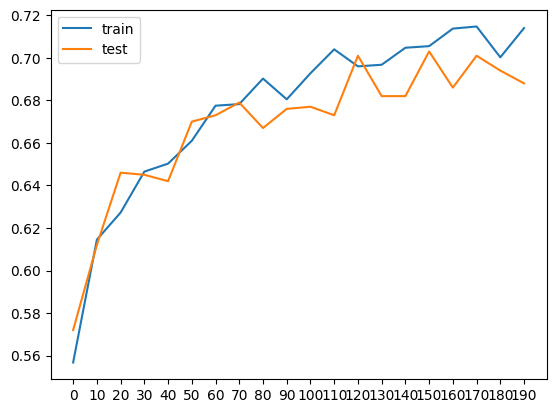

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
log_period = 10
n_epoch = 200

model, loss_train, loss_test, acc_train, acc_test = train_model(
    model, opt,
    X_train_torch, y_train_torch_bin,
    X_test_torch, y_test_torch_bin,
    n_epoch=n_epoch,
    log_period=log_period)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xticks(np.arange(0, len(acc_train)), np.arange(0, n_epoch, log_period))
plt.legend();

Выберите правильный вывод.

1. Нейросеть обучилась отлично
2. Нейросеть переобучилась
3. Нейросеть недообучилась

## 5 задание



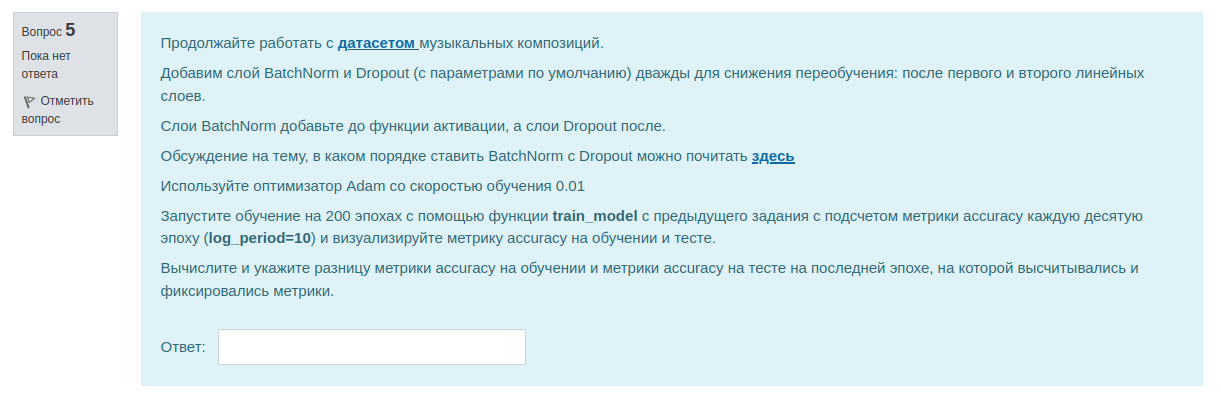

In [ ]:
import torch
from torch import nn


def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)  # для фиксации случайности

    model = nn.Sequential(
        nn.Linear(num_features, hid_size),
        nn.BatchNorm1d(hid_size),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(hid_size, hid_size),
        nn.BatchNorm1d(hid_size),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(hid_size, n_out),
        nn.Sigmoid()
    )

    return model


num_features = X_train.shape[1]
n_out = 1
hid_size = 50


model = create_model(hid_size, num_features, n_out)
model

Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=50, out_features=1, bias=True)
  (9): Sigmoid()
)



Используйте оптимизатор Adam со скоростью обучения 0.01

Запустите обучение на 200 эпохах с помощью функции `train_model` с предыдущего задания с подсчетом метрики accuracy каждую десятую эпоху (`log_period=10`) и визуализируйте метрику accuracy на обучении и тесте.


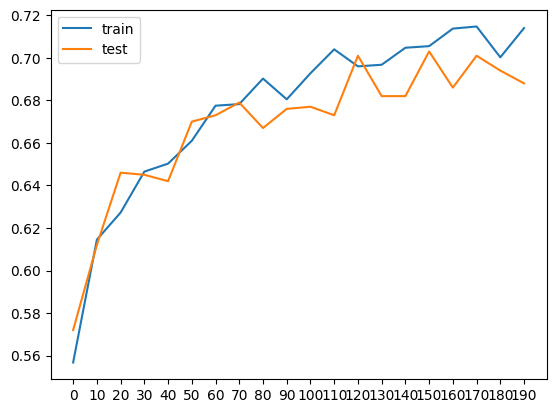

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
log_period = 10
n_epoch = 200

model, loss_train, loss_test, acc_train, acc_test = train_model(
    model, opt,
    X_train_torch, y_train_torch_bin,
    X_test_torch, y_test_torch_bin,
    n_epoch=n_epoch,
    log_period=log_period)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xticks(np.arange(0, len(acc_train)), np.arange(0, n_epoch, log_period))
plt.legend();

Вычислите и укажите разницу метрики accuracy на обучении и метрики accuracy на тесте на последней эпохе, на которой высчитывались и фиксировались метрики.

In [ ]:
acc_train[-1] - acc_test[-1]

tensor(0.0260)

## 6 задание

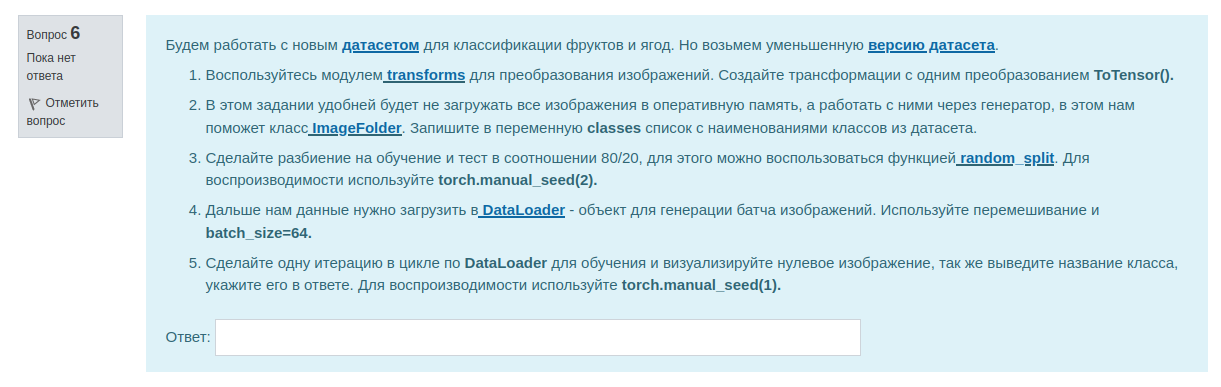

Будем работать с новым [датасетом](https://www.kaggle.com/datasets/sshikamaru/fruit-recognition/data) для классификации фруктов и ягод. Но возьмем уменьшенную [версию](https://drive.google.com/file/d/1Oc-pVYttZObBUck_pktN5XPqJbqRcjSp) датасета.

In [ ]:
!pip install gdown

In [ ]:
!gdown 'https://drive.google.com/uc?id=1Oc-pVYttZObBUck_pktN5XPqJbqRcjSp' -O fruit.zip

Downloading...
From (original): https://drive.google.com/uc?id=1Oc-pVYttZObBUck_pktN5XPqJbqRcjSp
From (redirected): https://drive.google.com/uc?id=1Oc-pVYttZObBUck_pktN5XPqJbqRcjSp&confirm=t&uuid=a811fca9-4df0-45e9-8c0a-7ef07ca155cb
To: /content/fruit.zip
100% 35.2M/35.2M [00:00<00:00, 41.1MB/s]


In [ ]:
!unzip fruit.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Kiwi/Kiwi_364.jpg  
  inflating: dataset/Kiwi/Kiwi_410.jpg  
  inflating: dataset/Kiwi/Kiwi_369.jpg  
  inflating: dataset/Kiwi/Kiwi_260.jpg  
  inflating: dataset/Kiwi/Kiwi_195.jpg  
  inflating: dataset/Kiwi/Kiwi_356.jpg  
  inflating: dataset/Kiwi/Kiwi_167.jpg  
  inflating: dataset/Kiwi/Kiwi_352.jpg  
  inflating: dataset/Kiwi/Kiwi_101.jpg  
  inflating: dataset/Kiwi/Kiwi_319.jpg  
  inflating: dataset/Kiwi/Kiwi_457.jpg  
  inflating: dataset/Kiwi/Kiwi_401.jpg  
  inflating: dataset/Kiwi/Kiwi_77.jpg  
  inflating: dataset/Kiwi/Kiwi_277.jpg  
  inflating: dataset/Kiwi/Kiwi_5.jpg  
  inflating: dataset/Kiwi/Kiwi_347.jpg  
  inflating: dataset/Kiwi/Kiwi_283.jpg  
  inflating: dataset/Kiwi/Kiwi_429.jpg  
  inflating: dataset/Kiwi/Kiwi_65.jpg  
  inflating: dataset/Kiwi/Kiwi_418.jpg  
  inflating: dataset/Kiwi/Kiwi_135.jpg  
  inflating: dataset/Kiwi/Kiwi_204.jpg  
  inflating: dataset/Kiwi/Kiwi_36.jpg  
  inflating

Воспользуйтесь модулем [transforms](https://pytorch.org/vision/stable/transforms.html) для преобразования изображений. Создайте трансформации с одним преобразованием `ToTensor()`.

In [ ]:
from torchvision.transforms import transforms

transform = transforms.ToTensor()

В этом задании удобней будет не загружать все изображения в оперативную память, а работать с ними через генератор, в этом нам поможет класс [ImageFolder](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html).

Запишите в переменную `classes` список с наименованиями классов из датасета.

In [ ]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder('dataset', transform=transform)

classes = train_data.classes
len(classes)

15

Сделайте разбиение на обучение и тест в соотношении 80/20, для этого можно воспользоваться функцией [random_split](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split).

Для воспроизводимости используйте `torch.manual_seed(2)`

In [ ]:
from torch.utils.data import random_split
import torch

train_ratio = 0.8
dataset_size = len(train_data)
train_size = int(train_ratio * dataset_size)
test_size = dataset_size - train_size


train_data, test_data = random_split(train_data, [train_size, test_size],
                                      generator=torch.manual_seed(2))

train_size, test_size

(5873, 1469)

Дальше нам данные нужно загрузить в [DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders) - объект для генерации батча изображений.

Используйте перемешивание и `batch_size=64`

In [ ]:
import torch

batch_size = 64

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=True)

Сделайте одну итерацию в цикле по `DataLoader` для обучения и визуализируйте нулевое изображение, так же выведите название класса, укажите его в ответе.

Для воспроизводимости используйте `torch.manual_seed(1)`

Cherry


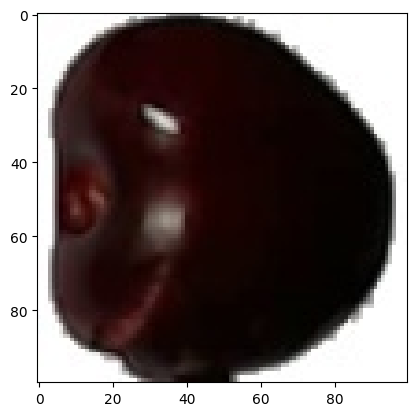

In [ ]:
import matplotlib.pyplot as plt


torch.manual_seed(1)
for data, y in train_loader:
    plt.imshow(data[0].permute(1, 2, 0))
    print(classes[y[0]])
    break

## 7 задание

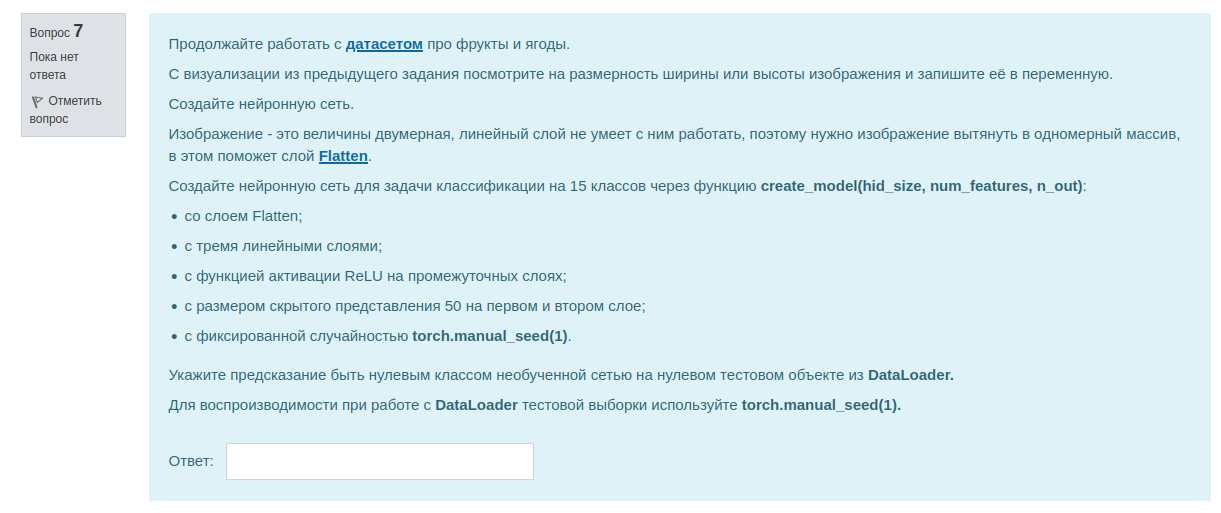

In [ ]:
img_size = data[0].shape[1]
num_features = 3 * img_size * img_size
n_out = len(classes)
hid_size = 50

Создайте нейронную сеть для задачи классификации на 15 классов через функцию `create_model(hid_size, num_features, n_out)`:
- со слоем Flatten
- с тремя линейными слоями
- с функцией активации ReLU на промежуточных слоях
- с размером скрытого представления 50 на первом и втором слое
- с фиксированной случайностью `torch.manual_seed(1)`.

In [ ]:
import torch
from torch import nn


def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)  # для фиксации случайности

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(num_features, hid_size),
        nn.ReLU(),
        nn.Linear(hid_size, hid_size),
        nn.ReLU(),
        nn.Linear(hid_size, n_out),
    )

    return model




model = create_model(hid_size, num_features, n_out)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=30000, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=15, bias=True)
)

Укажите предсказание быть нулевым классом необученной сетью на нулевом тестовом объекте из `DataLoader`.

Для воспроизводимости при работе с `DataLoader` тестовой выборки используйте `torch.manual_seed(1)`

In [ ]:
torch.manual_seed(1)

for data, y in test_loader:
    pred = model(data[:1])
    break

pred[0][0]

tensor(0.0455, grad_fn=<SelectBackward0>)

## 8 задание

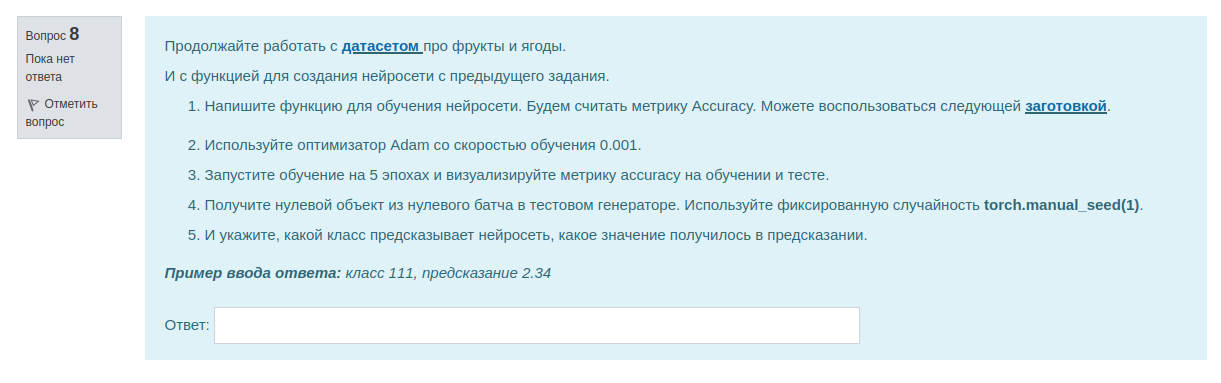

Напишите функцию для обучения нейросети. Будем считать метрику Accuracy. Можете воспользоваться следующей заготовкой:

```
from tqdm import tqdm

def train_model(model, opt, train_loader, test_loader, n_epoch=100):
    loss_fn = ...
    acc_train_list, acc_test_list = [], []

    for epoch_num in range(n_epoch):
        train_loss, test_loss = 0.0, 0.0
        correct_train, correct_test = 0, 0
        total_train, total_test = 0, 0

        for images, labels in tqdm(train_loader):
            ...  # обнуление градиентов
            y_predicted = ...  # получение предсказаний
            loss = ...  # подсчет функции потерь

            ...  # обратный проход
            ...  # шаг оптимизации

            # фиксация функции потерь и accuracy на обучении
            train_loss += loss.item()  # суммируем ошибку
            total_train += len(labels)  # суммируем кол-во объектов
            _, predicted = torch.max(y_predicted, 1)  # получаем предсказанные классы
            correct_train += (predicted == labels).sum().item()  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на обучении на всем train_loader
        train_acc = correct_train / total_train
        train_loss = train_loss / total_train
        acc_train_list.append(train_acc)

        
        for images, labels in test_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # фиксация функции потерь и accuracy на тесте
            test_loss += ...  # суммируем ошибку
            total_test += ...  # суммируем кол-во объектов
            _, predicted = ...  # получаем предсказанные классы
            correct_test += ...  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на тесте на всем test_loader
        test_acc = ...
        test_loss = ...

        acc_test_list.append(test_acc)


        # печатаем результаты эпохи
        print(f"Epoch {epoch_num+1}/{n_epoch} " \
              f"Train Loss: {train_loss:.3f} - Train Acc: {train_acc:.3f} " \
              f"Test Loss: {test_loss:.3f} - Test Acc: {test_acc:.3f}")

    return model, acc_train_list, acc_test_list
```

In [ ]:
from tqdm import tqdm

def train_model(model, opt, train_loader, test_loader, n_epoch=100):
    loss_fn = nn.CrossEntropyLoss()
    acc_train_list, acc_test_list = [], []

    for epoch_num in range(n_epoch):
        train_loss, test_loss = 0.0, 0.0
        correct_train, correct_test = 0, 0
        total_train, total_test = 0, 0

        for images, labels in tqdm(train_loader):
            opt.zero_grad()  # обнуление градиентов
            y_predicted = model(images)  # получение предсказаний
            loss = loss_fn(y_predicted, labels)  # подсчет функции потерь

            loss.backward()  # обратный проход
            opt.step()  # шаг оптимизации

            # фиксация функции потерь и accuracy на обучении
            train_loss += loss.item()  # суммируем ошибку
            total_train += len(labels)  # суммируем кол-во объектов
            _, predicted = torch.max(y_predicted, 1)  # получаем предсказанные классы
            correct_train += (predicted == labels).sum().item()  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на обучении на всем train_loader
        train_acc = correct_train / total_train
        train_loss = train_loss / total_train
        acc_train_list.append(train_acc)


        for images, labels in test_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # фиксация функции потерь и accuracy на тесте
            test_loss += loss.item()  # суммируем ошибку
            total_test += len(labels)  # суммируем кол-во объектов
            _, predicted = torch.max(outputs.data, 1)  # получаем предсказанные классы
            correct_test += (predicted == labels).sum().item()  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на тесте на всем test_loader
        test_acc = correct_test / total_test
        test_loss = test_loss / total_test

        acc_test_list.append(test_acc)


        # печатаем результаты эпохи
        print(f"Epoch {epoch_num+1}/{n_epoch} " \
              f"Train Loss: {train_loss:.3f} - Train Acc: {train_acc:.3f} " \
              f"Test Loss: {test_loss:.3f} - Test Acc: {test_acc:.3f}")

    return model, acc_train_list, acc_test_list



Используйте оптимизатор Adam со скоростью обучения 0.001

Запустите обучение на 5 эпохах и визуализируйте метрику accuracy на обучении и тесте.

100%|██████████| 92/92 [00:06<00:00, 14.24it/s]


Epoch 1/5 Train Loss: 0.021 - Train Acc: 0.593 Test Loss: 0.006 - Test Acc: 0.920


100%|██████████| 92/92 [00:06<00:00, 13.56it/s]


Epoch 2/5 Train Loss: 0.003 - Train Acc: 0.973 Test Loss: 0.001 - Test Acc: 0.989


100%|██████████| 92/92 [00:07<00:00, 12.08it/s]


Epoch 3/5 Train Loss: 0.001 - Train Acc: 0.997 Test Loss: 0.001 - Test Acc: 0.997


100%|██████████| 92/92 [00:05<00:00, 15.52it/s]


Epoch 4/5 Train Loss: 0.000 - Train Acc: 0.999 Test Loss: 0.000 - Test Acc: 1.000


100%|██████████| 92/92 [00:06<00:00, 14.45it/s]


Epoch 5/5 Train Loss: 0.000 - Train Acc: 1.000 Test Loss: 0.000 - Test Acc: 1.000


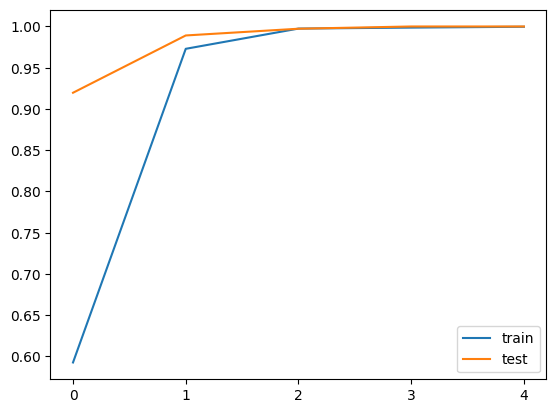

In [ ]:
import numpy as np

opt = torch.optim.Adam(model.parameters(), lr=0.001)
n_epoch = 5

model, acc_train, acc_test = train_model(
    model, opt,
    train_loader,
    test_loader,
    n_epoch=n_epoch
)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xticks(np.arange(0, len(acc_train)), np.arange(0, n_epoch))
plt.legend();

Получите нулевой объект из нулевого батча в тестовом генераторе. Используйте фиксированную случайность `torch.manual_seed(1)`.


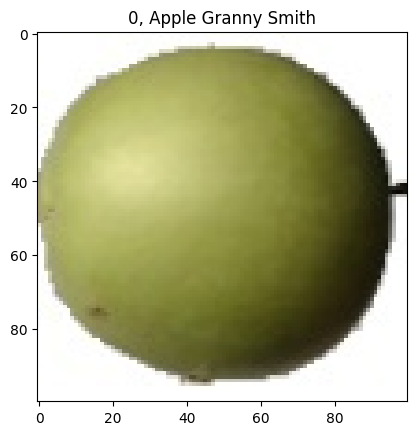

In [ ]:
torch.manual_seed(1)
for imgs, labels in test_loader:
    img = imgs[0]
    label = labels[0]
    break

plt.title(f'{label}, {classes[label]}')
plt.imshow(img.permute(1, 2, 0));

И укажите, какой класс предсказывает нейросеть, какое значение получилось в предсказании.

In [ ]:
preds = model(img[None])
torch.argmax(preds), torch.max(preds)

(tensor(0), tensor(18.3804, grad_fn=<MaxBackward1>))